# Communicate Data findings Project 
## by Saad Almlehe

## Investigation Overview

> In this project, I will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships.

## Dataset Overview

> The dataset: <br>
includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
cleand_bike = pd.read_csv('cleand.csv')

## Visualization 1 : The distrubation of ages

> in this visualization we will see the distrubation of riders age and thier median

- we have left skewed distribution.
- the median is around 33 year old. 

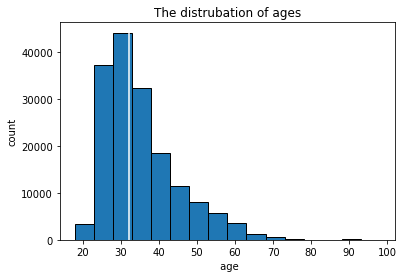

In [3]:
# here I Will create arange to visulaize better 
age_range = np.arange(18,99,5)

# here I will creat the chart and style it with bins and edge color
plt.hist(cleand_bike['age'] , bins = age_range , edgecolor = 'black' )

# here i will put some char informations to be easy to read 
plt.xlabel(' age')
plt.ylabel('count')
plt.title('The distrubation of ages')
# here i will find the median to compare it to the other graph 
plt.axvline(cleand_bike['age'].median() , color = 'white');

## Visualization 2: The correlation between duration and start - end station distance

> in this visualization we will see if rider who have diffrent start and end station will have corrlation with the time he spent on bike. 

- there are a positive correlation between the duration and the distance between the start and end station.

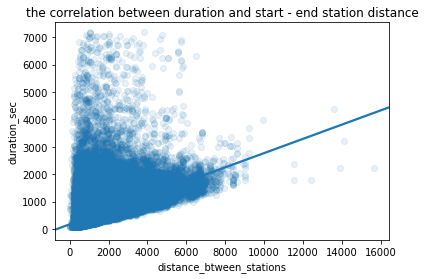

In [5]:
plt.xlabel('duration in seconds')
plt.ylabel('distance btween stations')
plt.title('the correlation between duration and start - end station distance')
# remove any bike that have returned in the same station
bike_v1 = cleand_bike[cleand_bike['distance_btween_stations'] != 0]
# remove one outlier 
bike_v1 = bike_v1[bike_v1['distance_btween_stations'] < 50000]
sb.regplot(data = bike_v1, x = 'distance_btween_stations', y = 'duration_sec', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

plt.scatter(data = bike_v1, x = 'distance_btween_stations', y = 'duration_sec', alpha=1/20);

## Visualization 3 : The realtion btween the days and each day times

> in this visualization we will see the active ridiers in each day of week in three times moring , eveing and afternoon. 

- riders are most active in work days moring and afternoon 
- riders are less active in the whole weekend


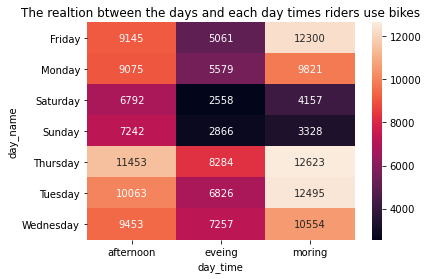

In [9]:
# creat heatmap and style it 
plt.xlabel('day time')
plt.ylabel('day name')
plt.title('The realtion btween the days and each day times riders use bikes')
days = cleand_bike.groupby(['day_name', 'day_time']).size()
days = days.reset_index(name='count')
days = days.pivot(index = 'day_name', columns = 'day_time', values = 'count')
sb.heatmap(days, annot = True, fmt = 'd');

## Visualization 4 : The relation of duration and ages based on the gender 

> in this visualization we will see how duration change with males and females in same age.

- male riders have very significant different than females in age between 70 and 85 year old.
- female riders in the rest of ages almost spends more or equal time with males.

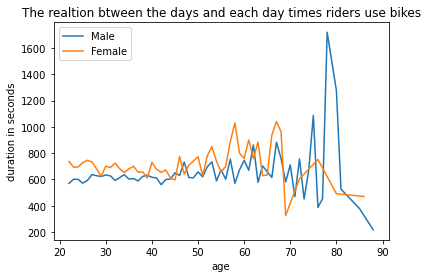

In [11]:
# store males and females 
plt.xlabel('age')
plt.ylabel('duration in seconds')
plt.title('The realtion btween the days and each day times riders use bikes')
male = cleand_bike[cleand_bike['member_gender'] == 'Male']
female = cleand_bike[cleand_bike['member_gender'] == 'Female']

# using groupby method to store age with duration mean 
male = male.groupby('age')['duration_sec'].mean()
female = female.groupby('age')['duration_sec'].mean()
# creat line chart and style it 
plt.plot(male.index , male , label = 'Male')
plt.plot(female.index , female , label = 'Female')
plt.legend();

In [10]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --template output_toggle.tpl --ServePostProcessor.port=8800

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Admin\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Admin\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Admin\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Admin\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\Admin\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 489, in convert_single_notebook
    output, resources = self.export_single_notebook(notebook_file